# SIMPLE LINEAR REGRESSION PROBLEM

In [82]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns,warnings as w
w.filterwarnings('ignore')

In [83]:
data = pd.read_csv('Scores.csv')

In [84]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [86]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [87]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

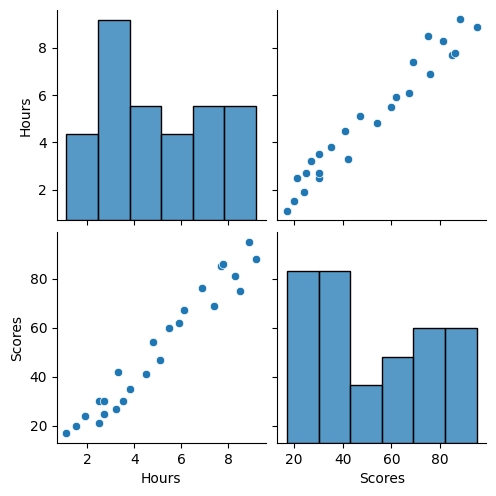

In [88]:
sns.pairplot(data)

In [89]:
X = data['Hours']
Y = data['Scores']

# X = data.iloc[:,0]
# Y = data.iloc[:,-1]

In [90]:
X.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [91]:
Y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)

# Linear Regression Algorithm Applies here

1. Import the linear Regression Model
2. Initialise the Model
3. Train the model
4. Make Predictions

In [93]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1) , Y_train)
Y_pred = lr.predict(X_test.values.reshape(-1,1))

In [94]:
Y_pred

array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])

In [95]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(20,) (20,) (5,) (5,)


In [96]:
Y_test

14    17
13    42
17    24
3     75
21    54
Name: Scores, dtype: int64

In [97]:
lr.coef_

array([10.46110829])

In [98]:
lr.intercept_

-1.5369573315500702

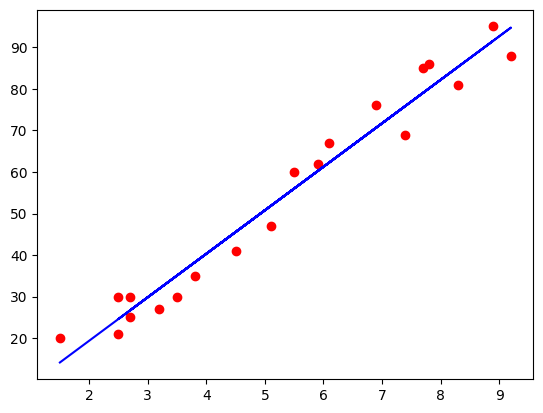

In [99]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,lr.predict(X_train.values.reshape(-1,1)),color='Blue')
plt.show()

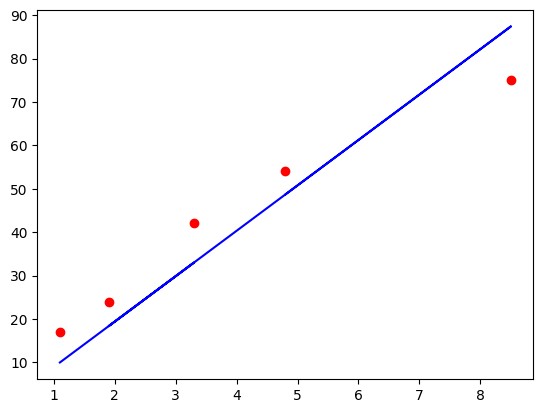

In [100]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,lr.predict(X_test.values.reshape(-1,1)),color='Blue')
plt.show()

In [101]:
print(lr.score(X_train.values.reshape(-1,1),Y_train.values.reshape(-1,1)))

0.9637848283990599


In [102]:
print(lr.score(X_test.values.reshape(-1,1),Y_test.values.reshape(-1,1)))

0.8421031525243527


In [103]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test,Y_pred) * 100
print(f"MAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\nAccuracy (R2-Score) : {r2}")

MAE : 7.882398086270432
MSE : 68.88092074277635
RMSE : 8.299453038771674
Accuracy (R2-Score) : 84.21031525243528


In [104]:
def prediction():
    newobs = float(input("Enter your number of hours of study : "))
    yp = lr.predict([[newobs]])[0]
    print(f"The marks you will get after studying for {newobs} hours is {yp}")
prediction()

Enter your number of hours of study :  9.2


The marks you will get after studying for 9.2 hours is 94.70523896935072
